In [2]:
# Handeling all imports for this notebook
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots. good visualizing
import seaborn as sns

import itertools
import sklearn.model_selection as ms
from sklearn.linear_model import RidgeCV as rcv
from sklearn.model_selection import RepeatedKFold as rkf
import sklearn.metrics as met
import warnings

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15,10)

# Standard colour scheme.
plt.style.use('ggplot')

# Red Wine Quaility Dataset
***

In [4]:
# Load the data set from github url.
data = pd.read_csv("https://raw.githubusercontent.com/FionnBrowne/Emerging-Technologies/main/Datasets_CSV/winequality-red.csv", sep=";")

In [5]:
# Displaying the data.
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [8]:
# Summary statistics.
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Visualising the data
***

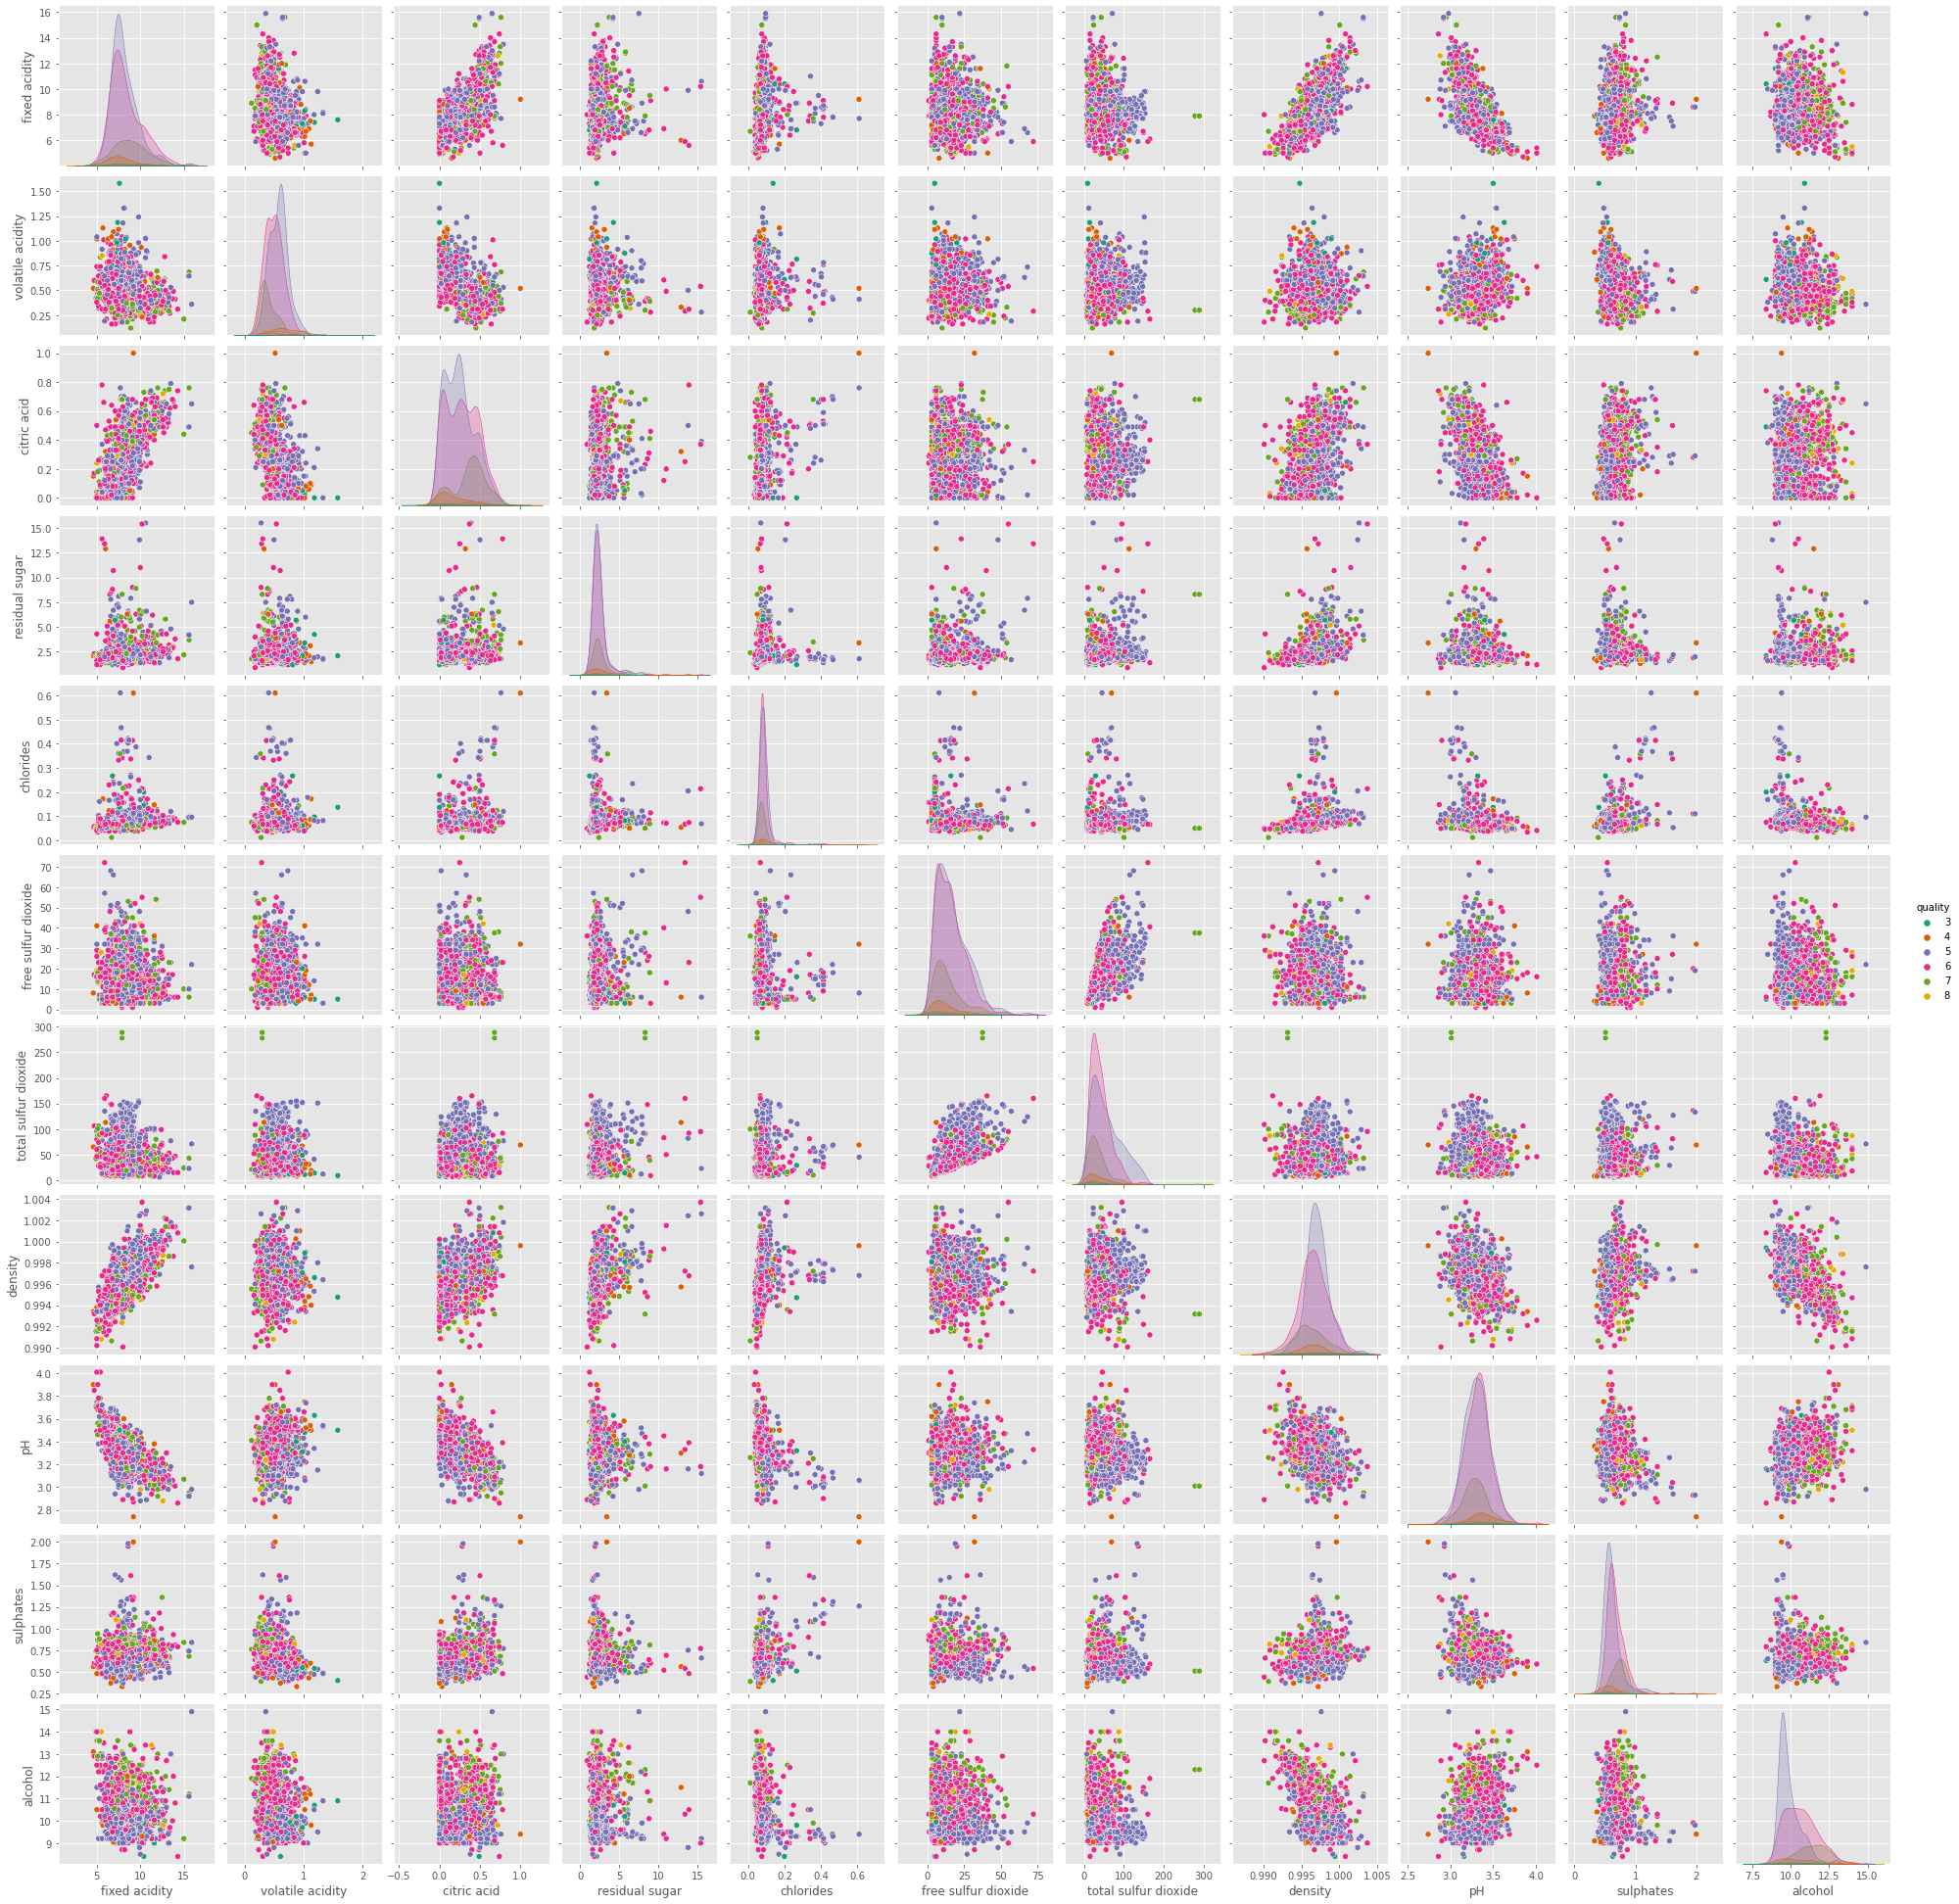

In [10]:
# Scatter plots and kdes.
#
sns.pairplot(data, hue='quality', palette='Dark2');

# Plotting agenst two attributes
***

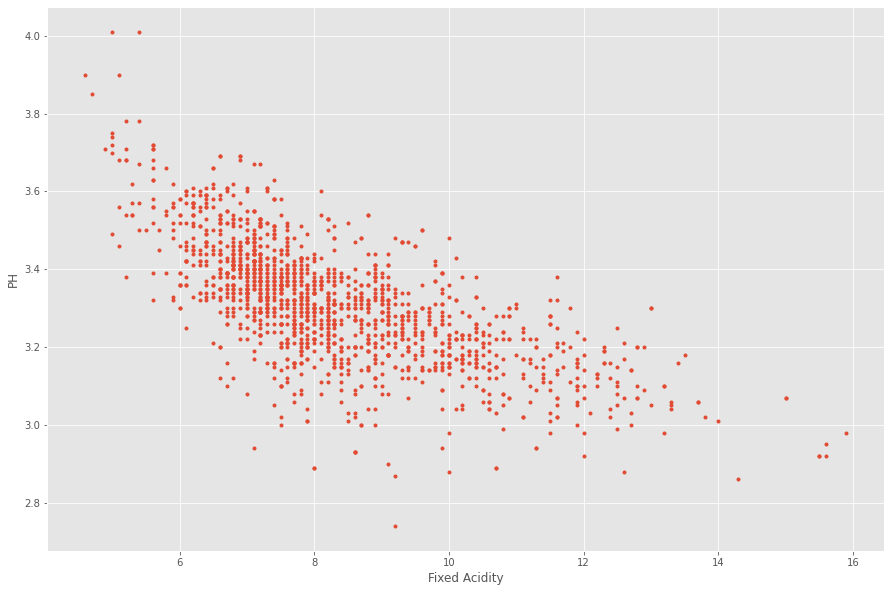

In [12]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(data['fixed acidity'], data['pH'], '.')

# Set axis labels.
ax.set_xlabel('Fixed Acidity');
ax.set_ylabel('PH');

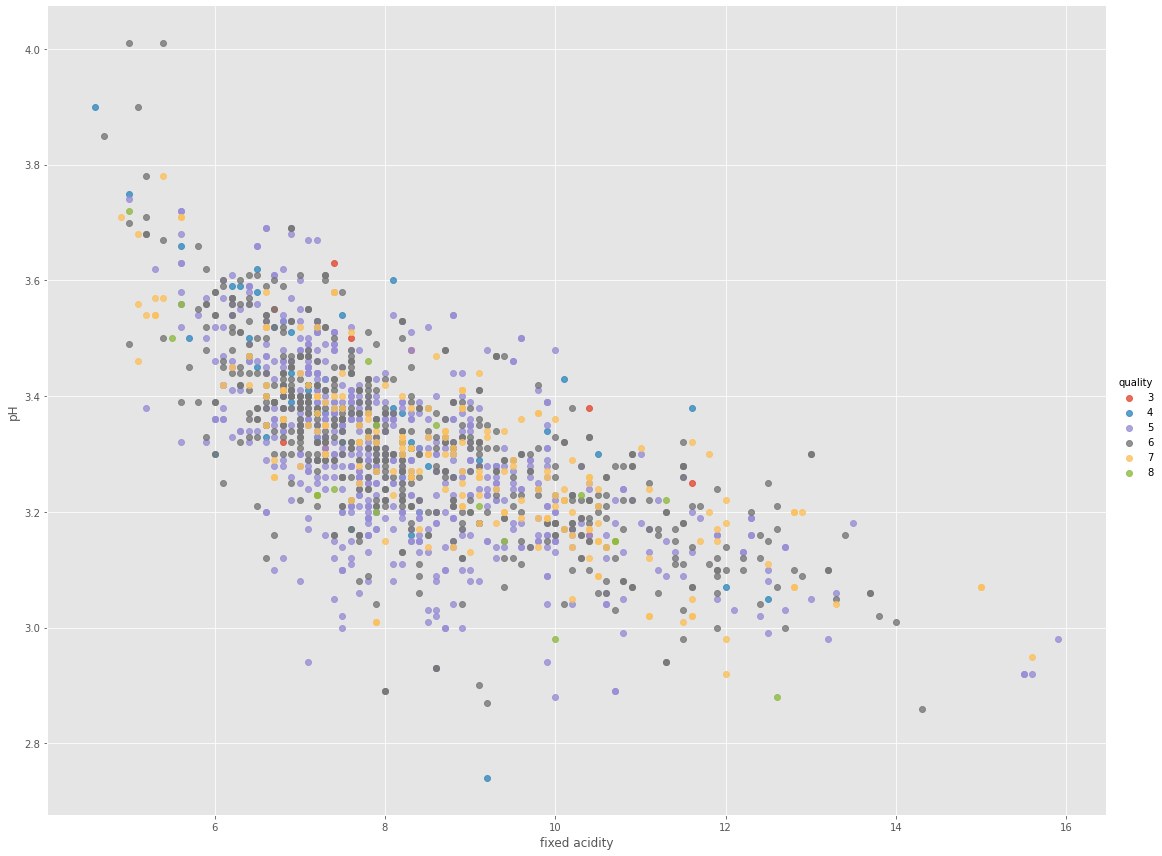

In [13]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="fixed acidity", y="pH", hue='quality', data=data, fit_reg=False, height=12, aspect=1.3);

# Correlation
***

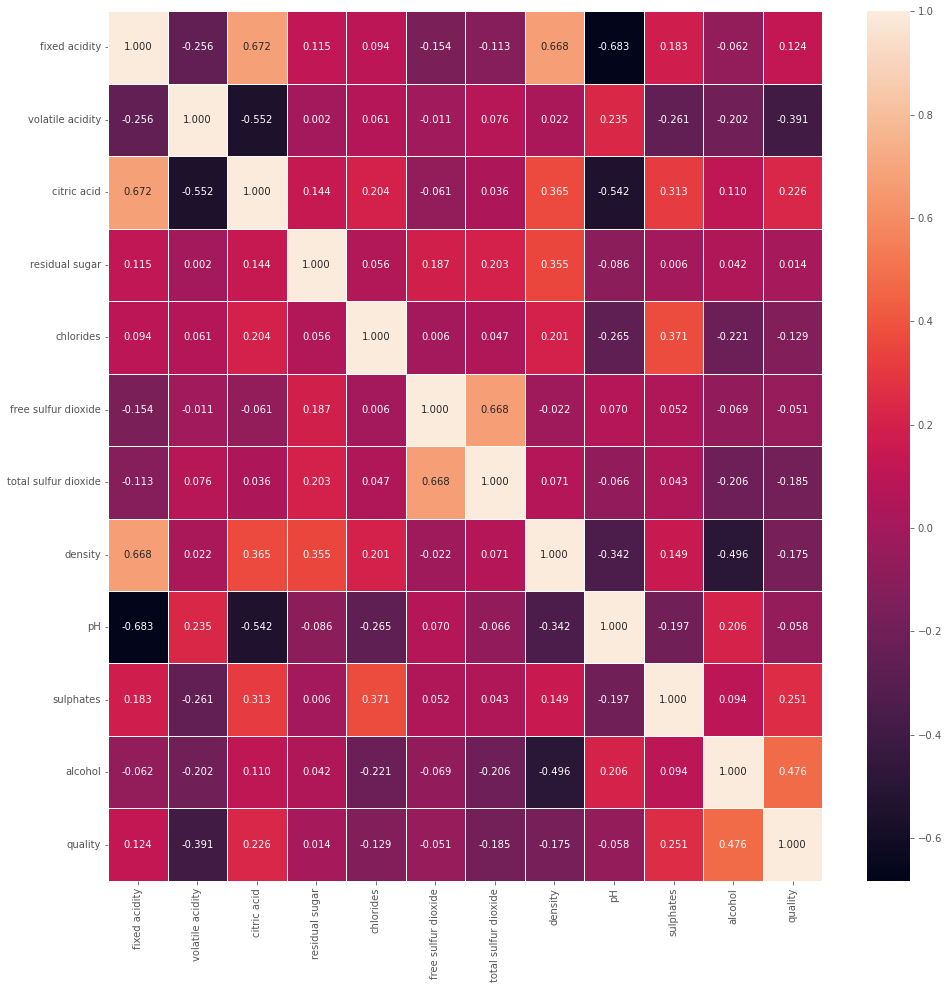

In [14]:
#correlation map view
data.corr() 
# New figure & subplot.
fig, ax = plt.subplots(figsize = (16,16))
# visualise using heat colours and to 3 decimal places
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".3f", ax=ax)
plt.show()

#### Displaying the relationships to see if there + or - or nuetral to see how strong the corrilation is

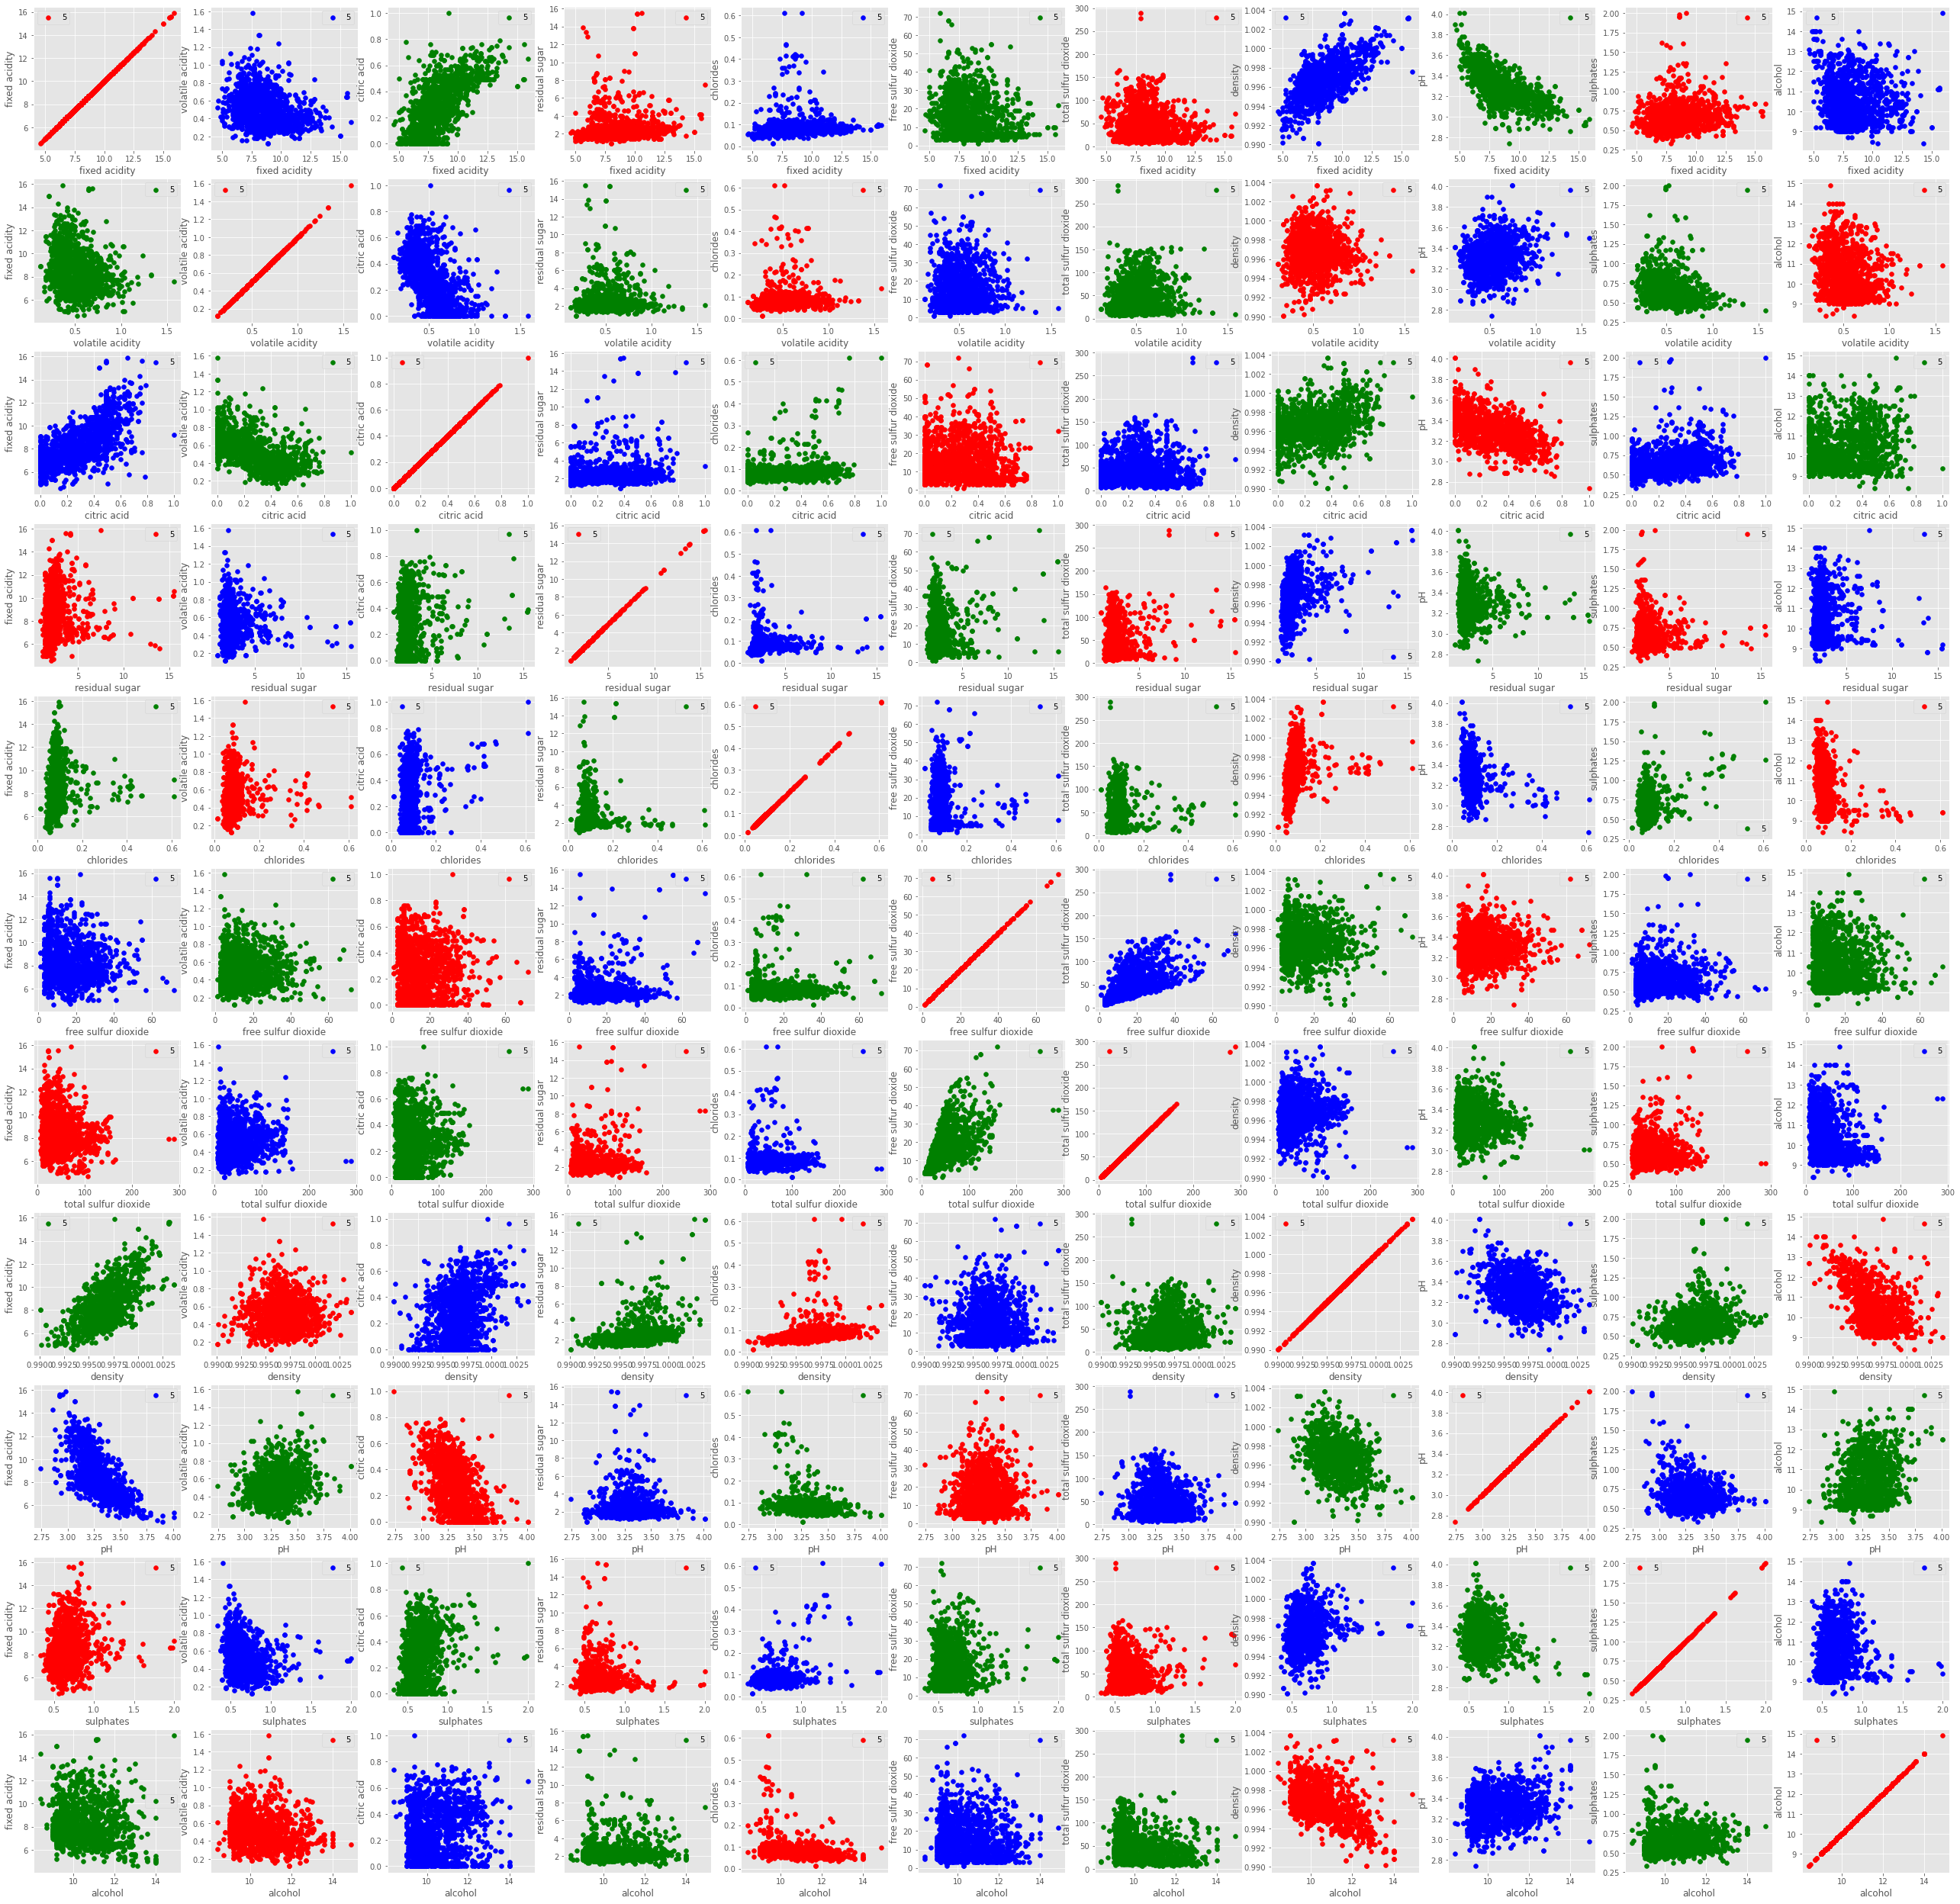

In [15]:
colors = itertools.cycle(["r", "b", "g"])
fig, axes = plt.subplots(11,11, figsize=(45,45))
for i in range(11):
    for j in range(11):
        axes[i, j].scatter(data.iloc[:,i], data.iloc[:,j],  color=next(colors))
        axes[i,j].set_xlabel(data.columns[i])
        axes[i,j].set_ylabel(data.columns[j])
        axes[i,j].legend(data.quality)
plt.show()

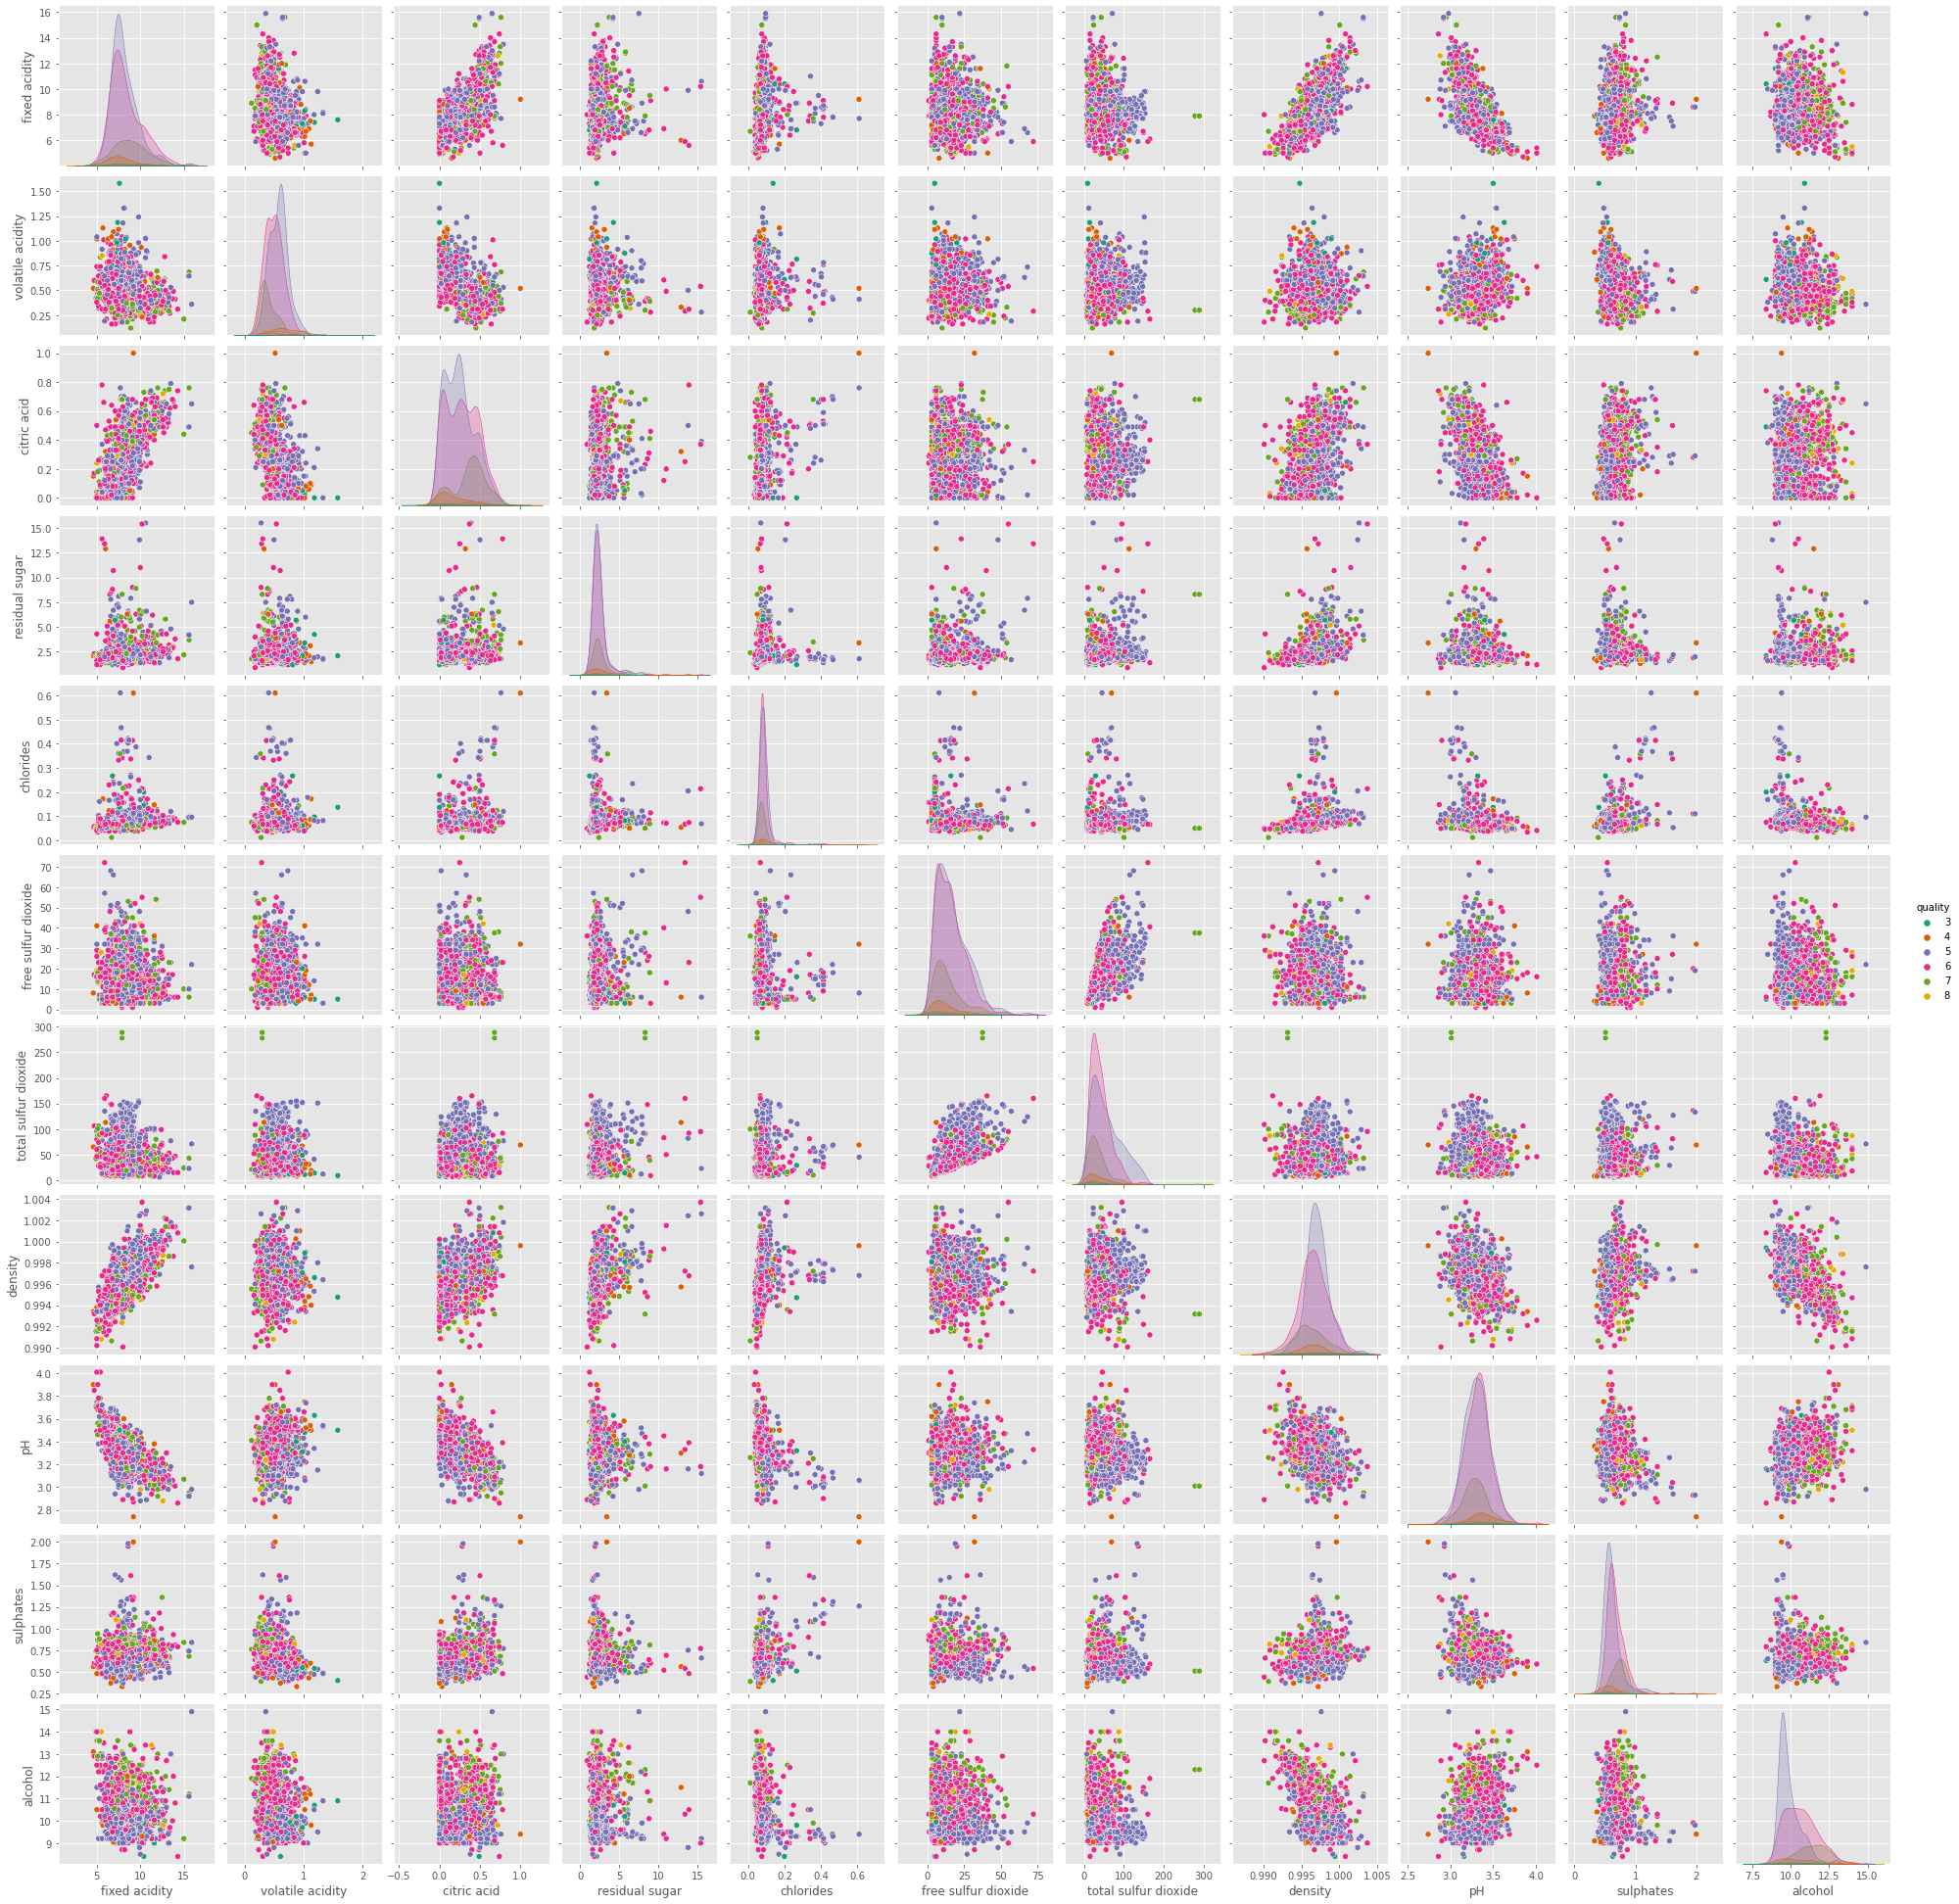

In [16]:
#This time using pairPlot
p = sns.pairplot(data, hue="quality", palette='Dark2')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


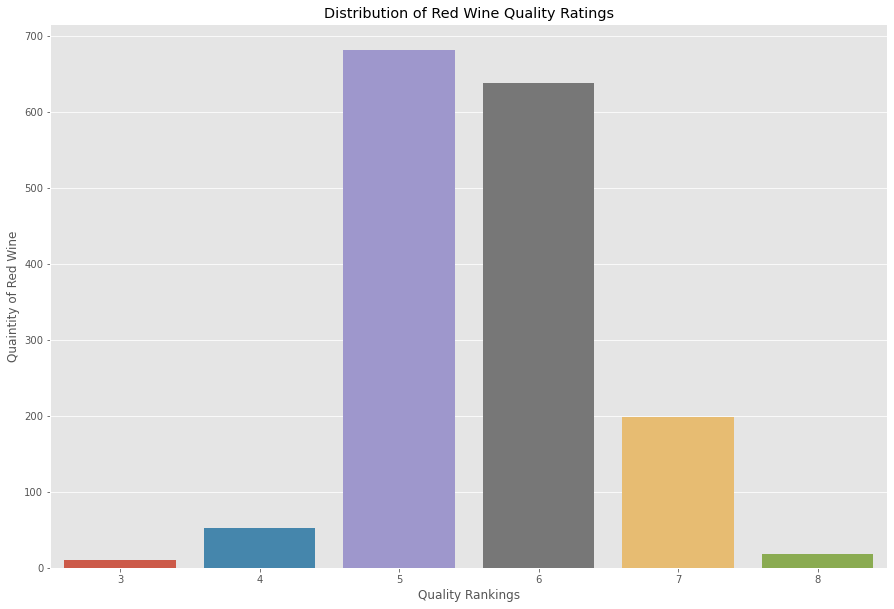

In [17]:
#How many wine quality number is realted with how many unique wines
#print(data['quality'].value_counts())
sns.barplot(data['quality'].unique(),data['quality'].value_counts())
plt.xlabel("Quality Rankings")
plt.ylabel("Quaintity of Red Wine")
plt.title("Distribution of Red Wine Quality Ratings")
plt.show()

In [18]:
print(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-pack

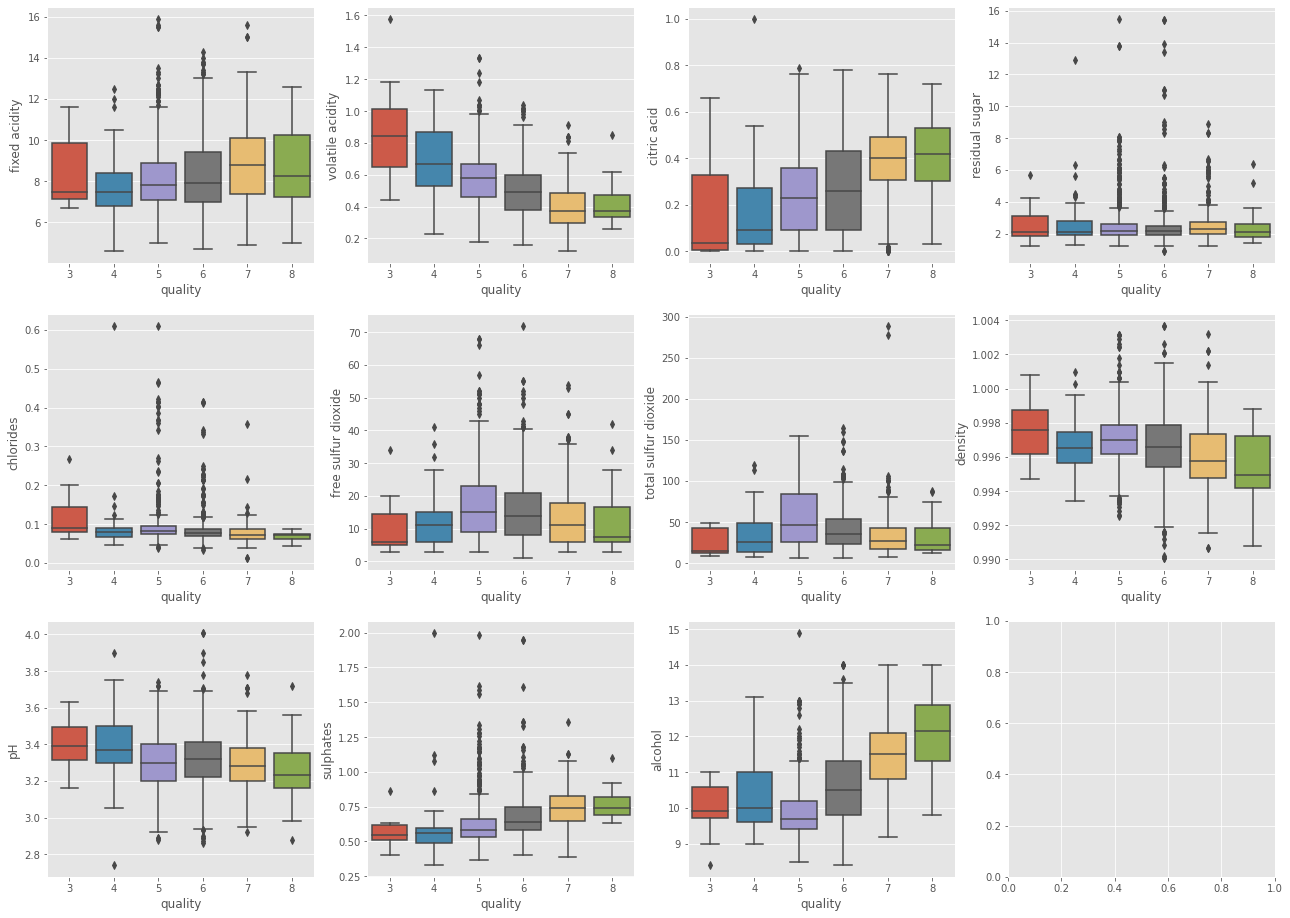

In [19]:
#Check the outliers for each feature with respect to output value
fig, ax1 = plt.subplots(3,4, figsize=(22,16))
k = 0
for i in range(3):
    for j in range(4):
        if k != 11:
            sns.boxplot('quality',data.iloc[:,k], data=data, ax = ax1[i][j])
            k += 1
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-pack

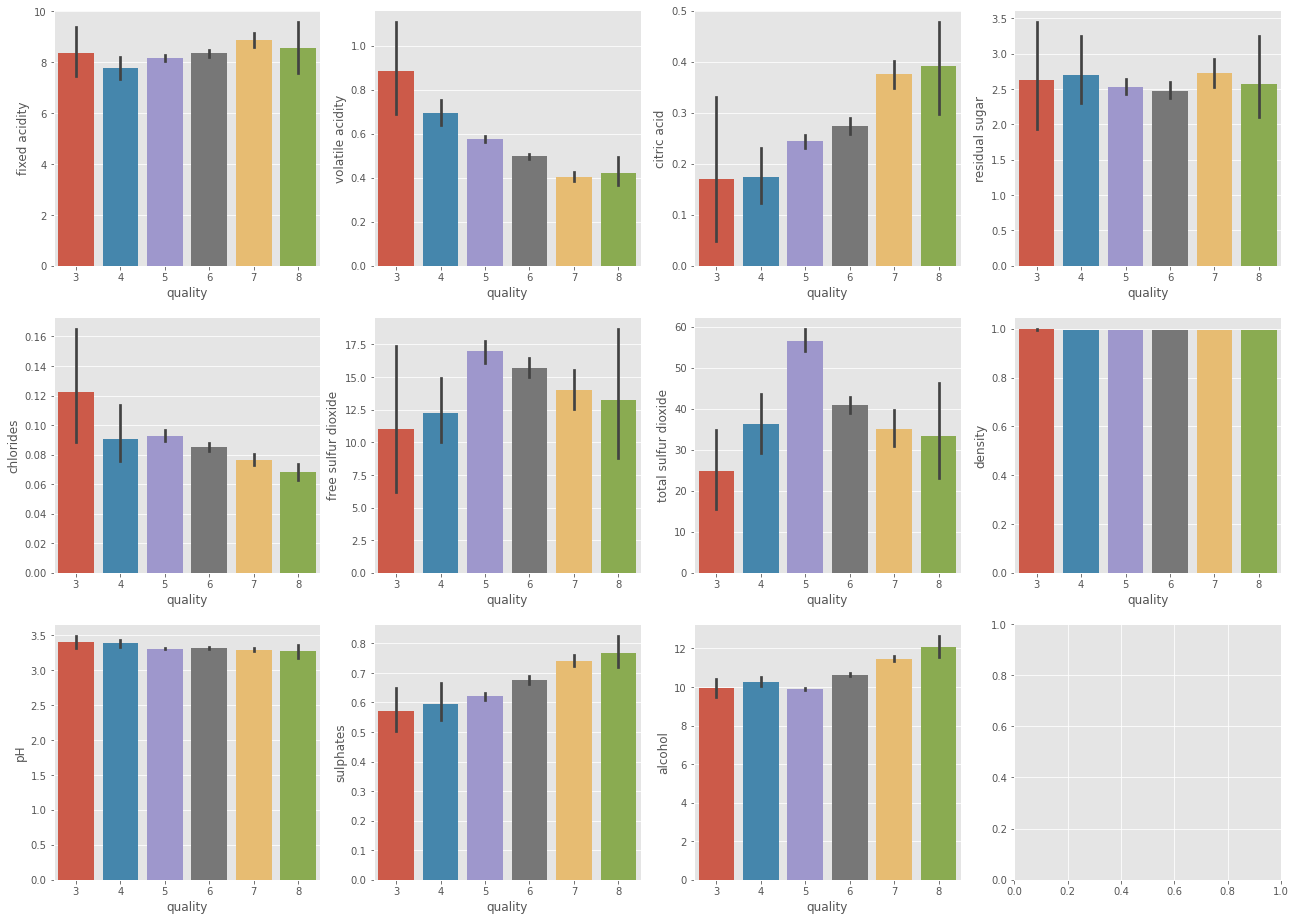

In [20]:
#Check the outliers for each feature with respect to output value
fig, ax1 = plt.subplots(3,4, figsize=(22,16))
k = 0
for i in range(3):
    for j in range(4):
        if k != 11:
            sns.barplot('quality',data.iloc[:,k], data=data, ax = ax1[i][j])
            k += 1
plt.show()

In [60]:
#training values
#define predictor and response variables
X = data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates","alcohol"]]

y = data["quality"]

#rkf is used to balance the dataset to provide a more accurate line of best git
cv = rkf(n_splits=10, n_repeats=3, random_state=1)

#define model / ridgeregression algothrim RidgeCV
model = rcv(alphas= np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [32]:
#training the sample data set
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state =0)

In [35]:
#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE (score estimator, what value a need to give line of best fit)
print(model.alpha_)

0.0


In [36]:
# predicted/expected y value
y_pred = model.predict(X_test)

In [38]:
# display expected y values
y_pred

array([5.7829301 , 5.03619267, 6.59698929, 5.33912637, 5.93952898,
       5.0072068 , 5.39616171, 6.05211188, 4.86760343, 4.95067572,
       5.28580441, 5.41265269, 5.7057424 , 5.12921737, 5.52885206,
       6.38052412, 6.81012527, 5.73803346, 5.97618825, 5.08613415,
       6.34479863, 5.16400983, 5.64203971, 6.1462903 , 5.4817802 ,
       5.03391406, 5.18721293, 6.48783659, 5.33301372, 6.30458308,
       6.03452293, 5.82849303, 5.58503524, 5.28512701, 5.75656128,
       6.15273792, 5.14134479, 5.48228021, 6.38983359, 5.7901819 ,
       5.42936928, 6.04810414, 6.70159678, 6.60160183, 5.97253803,
       4.78890763, 5.49565005, 6.01881894, 5.48895041, 6.10824243,
       5.3126164 , 5.28492351, 5.76043226, 6.36081498, 5.7195388 ,
       5.26971928, 5.08498332, 5.31050693, 6.50895816, 5.44323413,
       5.16377401, 5.76427324, 6.0703837 , 6.28933679, 5.07315141,
       6.11874641, 5.35681067, 6.01343647, 6.12184268, 5.98547673,
       5.35327968, 5.4367731 , 5.06017324, 5.58939889, 5.62593

In [42]:
# display x data
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1109           10.8             0.470         0.43            2.10      0.171   
1032            8.1             0.820         0.00            4.10      0.095   
1002            9.1             0.290         0.33            2.05      0.063   
487            10.2             0.645         0.36            1.80      0.053   
979            12.2             0.450         0.49            1.40      0.075   
...             ...               ...          ...             ...        ...   
794            10.1             0.270         0.54            2.30      0.065   
813             6.9             0.390         0.24            2.10      0.102   
1322            9.1             0.340         0.42            1.80      0.058   
704             9.1             0.765         0.04            1.60      0.078   
1023            8.2             0.320         0.42            2.30      0.098   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1109                 27.0                  66.0  0.99820  3.17       0.76   
1032                  5.0                  14.0  0.99854  3.36       0.53   
1002                 13.0                  27.0  0.99516  3.26       0.84   
487                   5.0                  14.0  0.99820  3.17       0.42   
979                   3.0                   6.0  0.99690  3.13       0.63   
...                   ...                   ...      ...   ...        ...   
794                   7.0                  26.0  0.99531  3.17       0.53   
813                   4.0                   7.0  0.99462  3.44       0.58   
1322                  9.0                  18.0  0.99392  3.18       0.55   
704                   4.0                  14.0  0.99800  3.29       0.54   
1023                  3.0                   9.0  0.99506  3.27       0.55   

      alcohol  
1109     10.8  
1032      9.6  
1002     11.7  
487      10.0  
979      10.4  
...       ...  
794      12.5  
813      11.4  
1322     11.4  
704       9.7  
1023     12.3  

[320 rows x 11 columns]

In [43]:
X_test.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     320.000000        320.000000   320.000000      320.000000   
mean        8.248750          0.519109     0.266156        2.481406   
std         1.766458          0.164379     0.191771        1.225246   
min         4.600000          0.160000     0.000000        1.300000   
25%         7.000000          0.390000     0.100000        1.900000   
50%         7.900000          0.510000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.600000          1.040000     0.790000       12.900000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  320.000000           320.000000            320.000000  320.000000   
mean     0.089234            15.243750             43.884375    0.996704   
std      0.044029            10.205335             29.893999    0.001909   
min      0.034000             1.000000              6.000000    0.990200   
25%      0.071000             6.000000             21.000000    0.995500   
50%      0.081000            13.000000             37.000000    0.996660   
75%      0.092000            21.000000             60.000000    0.997800   
max      0.415000            52.000000            165.000000    1.003150   

               pH   sulphates     alcohol  
count  320.000000  320.000000  320.000000  
mean     3.316250    0.654438   10.458906  
std      0.156186    0.146426    1.083854  
min      2.880000    0.330000    8.400000  
25%      3.210000    0.560000    9.587500  
50%      3.310000    0.620000   10.200000  
75%      3.400000    0.722500   11.200000  
max      3.900000    1.340000   14.000000

In [45]:
# difference between estimated amd expected values
model.score(X,y)

0.3593724283394686

In [49]:
met.mean_squared_error(y_test, y_pred)

0.3844711978201242

In [53]:
# check for null/empty values in the dataset
data.isnull().sum().sum()

0

In [56]:
# checks for unique values in the dataset
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
#classification